Number of training images: 60000
Number of testing images: 10000
Image width and height: 28 28


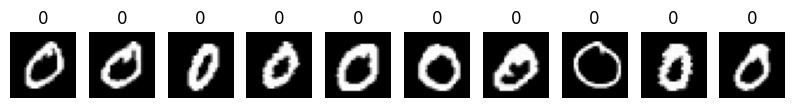

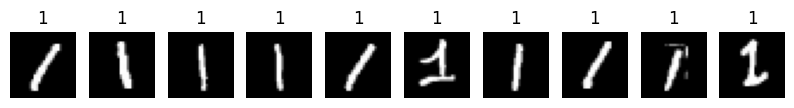

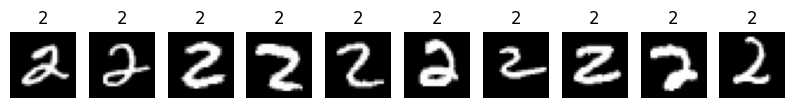

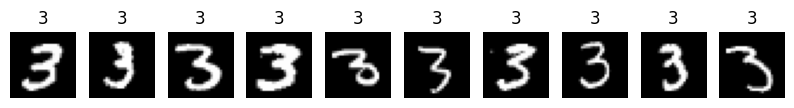

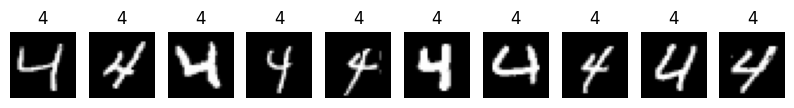

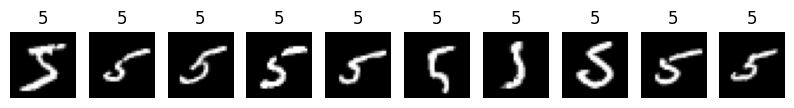

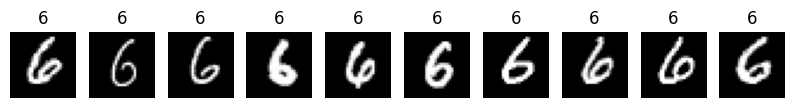

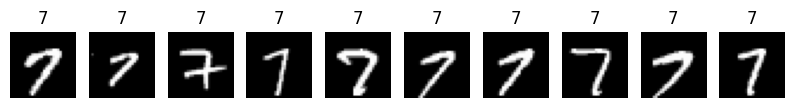

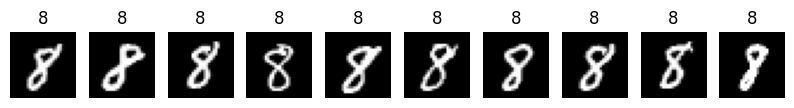

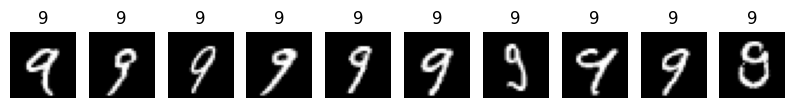

Number of training images (0 and 8): 11274
Number of validation images (0 and 8): 500
Number of testing images (0 and 8): 1954


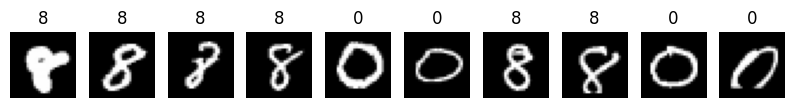

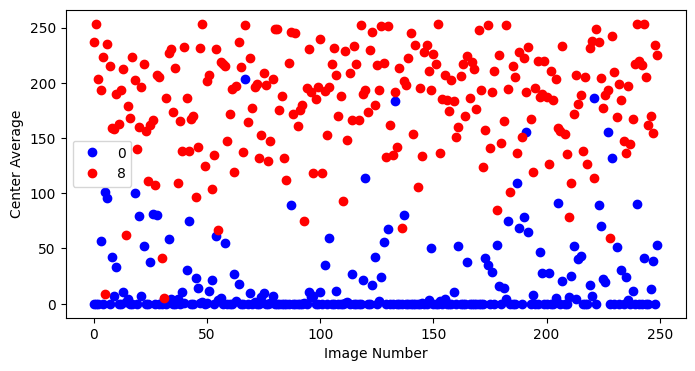

Training accuracy: 0.2524392407308852
Validation accuracy: 0.262
Testing accuracy: 0.26816786079836236


In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

# a)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Number of training images:", x_train.shape[0])
print("Number of testing images:", x_test.shape[0])
print("Image width and height:", x_train.shape[1], x_train.shape[2])

# b)
def plot_digits(images, labels):
    plt.figure(figsize=(10, 2))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# c)
for i in range(10):
    digits = x_train[y_train == i][:10]
    plot_digits(digits, [i] * 10)

# d)
x_train_01 = x_train[np.logical_or(y_train == 0, y_train == 8)]
y_train_01 = y_train[np.logical_or(y_train == 0, y_train == 8)]
x_test_01 = x_test[np.logical_or(y_test == 0, y_test == 8)]
y_test_01 = y_test[np.logical_or(y_test == 0, y_test == 8)]

# e)
indices = np.random.choice(len(x_train_01), size=500, replace=False)
x_valid_01 = x_train_01[indices]
y_valid_01 = y_train_01[indices]
x_train_01 = np.delete(x_train_01, indices, axis=0)
y_train_01 = np.delete(y_train_01, indices, axis=0)

# f)
print("Number of training images (0 and 8):", x_train_01.shape[0])
print("Number of validation images (0 and 8):", x_valid_01.shape[0])
print("Number of testing images (0 and 8):", x_test_01.shape[0])

# g)
plot_digits(x_valid_01[:10], y_valid_01[:10])

# h)
def center_average(images):
    center = images[:, 12:16, 12:16]
    return np.mean(center, axis=(1, 2))

x_train_attr = center_average(x_train_01)
x_valid_attr = center_average(x_valid_01)
x_test_attr = center_average(x_test_01)

# i)
plt.figure(figsize=(8, 4))
plt.plot(x_valid_attr[y_valid_01 == 0], 'bo', label='0')
plt.plot(x_valid_attr[y_valid_01 == 8], 'ro', label='8')
plt.xlabel("Image Number")
plt.ylabel("Center Average")
plt.legend()
plt.show()

# j)
threshold = 0.4

# k)
def calculate_accuracy(x_attr, y_true, threshold):
  predictions = (x_attr > threshold).astype(int)
  return np.mean(predictions == y_true)

train_accuracy = calculate_accuracy(x_train_attr, y_train_01, threshold)
validation_accuracy = calculate_accuracy(x_valid_attr, y_valid_01, threshold)
test_accuracy = calculate_accuracy(x_test_attr, y_test_01, threshold)

print("Training accuracy:", train_accuracy)
print("Validation accuracy:", validation_accuracy)
print("Testing accuracy:", test_accuracy)